In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 4095.64it/s]


In [6]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [7]:
# id_nodes_length_sub

In [8]:
# id_edges_length_sub

In [9]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# city_sub_nodes

In [13]:
# city_sub_stations

In [14]:
# city_sub_edges

In [15]:
# city_sub_routes

In [16]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [17]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [18]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [19]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [20]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [21]:
# city_sub_order_route_dict

In [22]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [23]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [24]:
# city_sub_all_shortest_paths_id_dict

In [25]:
# city_sub_edges

In [26]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [27]:
# city_sub_ordered_edges

In [28]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [29]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [30]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [31]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [32]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [33]:
# city_sub_extended_edges

### Organize edges dataframe for baseline network--city_sub_new_edges

In [34]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [35]:
# city_sub_shortest_path_edges_df

In [36]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [37]:
# city_sub_new_edges

### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [38]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [39]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [40]:
# city_sub_shortest_path_nodes_id

In [41]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [42]:
# city_sub_new_nodes

### Add columns to stations--city_sub_new_staions

In [43]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [44]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [45]:
city_sub_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,328,POINT (4.98916 52.29641),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,855,POINT (4.974 52.29564),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,854,POINT (4.96013 52.29813),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,810,POINT (4.95213 52.30687),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,809,POINT (4.94762 52.31181),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (4.96734 52.32837),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,823,POINT (4.95669 52.33041),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,829,POINT (4.94628 52.32683),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
85,827,POINT (4.93028 52.32974),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [46]:
connect_stations_name,connect_stations_dataframe = select_connect_stations_one_network(city_sub_new_stations)

In [47]:
connect_stations_name

['Centraal Station', 'Spaklerweg', 'Van der Madeweg', 'Zuid']

In [48]:
# connect_stations_dataframe

### Build connection edges

In [49]:
city_sub_connected_edges, city_sub_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name,city_sub_new_stations,id_edges_length_sub,city_sub_new_edges)

In [50]:
# city_sub_connected_edges

# Tram-Amsterdam

## Generate Baseline Networks

In [51]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 4265.05it/s]


Calculate_degree possibly unhappy


In [52]:
# city_tram_stations

In [53]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [54]:
id_nodes_length_tram

1920

In [55]:
id_edges_length_tram 

2204

In [56]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [57]:
# city_tram_edges

In [58]:
# city_tram_nodes

In [59]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [60]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time','weights']]).to_file('city_tram_edges0502.GPKG',driver='GPKG')

In [61]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [62]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)

city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1641) & (city_tram_edges['to_id'] == 1576)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1640) & (city_tram_edges['to_id'] == 1641)].index, inplace=True)

city_tram_edges = city_tram_edges.reset_index(drop = True)

In [63]:
# city_tram_edges

In [64]:
# city_tram_nodes

In [65]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [66]:
# city_tram_stations

In [67]:
# city_tram_routes

In [68]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [69]:
# city_tram_order_id_pairs

In [70]:
# city_tram_all_shortest_paths_id_dict

In [71]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [72]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [73]:
# duplicated_rows

In [74]:
len(duplicated_rows)

18

In [75]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [76]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [77]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [78]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [79]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [80]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [81]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [82]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [83]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [84]:
# city_tram_shortest_path_edges_df

In [85]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [86]:
# city_tram_new_edges

In [87]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_new_edges0506.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [88]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [89]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [90]:
# city_tram_shortest_path_nodes_id

In [91]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [92]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [93]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [94]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [95]:
city_tram_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,2209,POINT (4.93261 52.3608),2,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,2371,POINT (4.92894 52.36093),2,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,2474,POINT (4.9257 52.36012),2,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,2480,POINT (4.91674 52.35907),2,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,2466,POINT (4.91359 52.36235),2,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,2427,POINT (4.9263 52.36814),2,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,2676,POINT (4.9296 52.3702),2,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,2383,POINT (4.93483 52.37301),2,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,2619,POINT (4.93817 52.37346),2,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


## Create virtual edges at connection stations on single tram network 

#### Select nodes where need to build virtual edges based on name

In [96]:
connect_stations_name_tram,connect_stations_dataframe_tram = select_connect_stations_one_network(city_tram_new_stations)

In [97]:
connect_stations_name_tram

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [98]:
# len(connect_stations_name_tram)

In [99]:
# connect_stations_dataframe_tram

### Build connection edges

In [100]:
id_edges_length_tram = city_tram_edges['id'].iloc[-1] + 1

In [101]:
# id_edges_length_tram

In [102]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_tram,city_tram_new_stations,id_edges_length_tram,city_tram_new_edges)

In [103]:
# len(city_tram_connect_edges_dfs)

In [104]:
# city_tram_connected_edges

In [105]:
# city_tram_connect_edges_dfs

In [106]:
duplicate_rows = city_tram_connected_edges[city_tram_connected_edges.duplicated(['id'], keep=False)]
duplicate_rows.sort_values(by='id')

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
1092,312009858,"LINESTRING (4.8991685 52.3662087, 4.8991313 52...",tram,None,1772,1644,1645,55.916258,0.003994,55.0,"(1645, 1644)","(1644, 1645)",2.0,Tram 14: Amsterdam Centraal Station => Amsterd...,tram,14
1091,312009858,"LINESTRING (4.8991685 52.3662087, 4.8991313 52...",tram,None,1772,1645,1644,55.916258,0.003994,55.0,"(1644, 1645)","(1645, 1644)",2.0,Tram 14: Amsterdam Centraal Station => Amsterd...,tram,14
668,325204605,"LINESTRING (4.8769861 52.3703587, 4.8769277 52...",tram,None,2060,1844,1845,10.002816,0.000714,10.0,"(1845, 1844)","(1844, 1845)",6.0,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 5"
667,325204605,"LINESTRING (4.8769861 52.3703587, 4.8769277 52...",tram,None,2060,1845,1844,10.002816,0.000714,10.0,"(1844, 1845)","(1845, 1844)",6.0,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 5"
662,582512959,"LINESTRING (4.8769277 52.3704412, 4.8765273 52...",tram,None,2464,1845,2104,167.342971,0.011953,167.0,"(2104, 1845)","(1845, 2104)",6.0,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 5"
661,582512959,"LINESTRING (4.8769277 52.3704412, 4.8765273 52...",tram,None,2464,2104,1845,167.342971,0.011953,167.0,"(1845, 2104)","(2104, 1845)",6.0,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 5"
677,582512961,"LINESTRING (4.8775579 52.3695272, 4.8774741 52...",tram,None,2466,1844,2521,100.380732,0.007170,100.0,"(2521, 1844)","(1844, 2521)",6.0,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 5"
678,582512961,"LINESTRING (4.8775579 52.3695272, 4.8774741 52...",tram,None,2466,2521,1844,100.380732,0.007170,100.0,"(1844, 2521)","(2521, 1844)",6.0,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 5"
877,708673972,"LINESTRING (4.89045 52.3555619, 4.8905493 52.3...",tram,None,2674,910,2059,120.083769,0.008577,120.0,"(2059, 910)","(910, 2059)",2.0,Tram 24: Amsterdam Centraal Station => Amsterd...,tram,24
878,708673972,"LINESTRING (4.89045 52.3555619, 4.8905493 52.3...",tram,None,2674,2059,910,120.083769,0.008577,120.0,"(910, 2059)","(2059, 910)",2.0,Tram 24: Amsterdam Centraal Station => Amsterd...,tram,24


In [107]:
len(duplicate_rows)

18

In [108]:
# gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_connected_edges20240612.gpkg',driver = 'GPKG')

# Output results of edges and stations of metro tram without connecting links

In [109]:
city_sub_new_stations_df = city_sub_new_stations
city_tram_new_stations_df = city_tram_new_stations

In [110]:
gpd.GeoDataFrame(city_sub_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']]).to_file('city_sub_new_stations0705.gpkg',driver = 'GPKG')

In [111]:
gpd.GeoDataFrame(city_tram_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']]).to_file('city_tram_new_stations0705.gpkg',driver = 'GPKG')

In [112]:
gpd.GeoDataFrame(city_sub_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_sub_connected_edges0705.gpkg',driver = 'GPKG')

In [113]:
gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_connected_edges0705.gpkg',driver = 'GPKG')

In [114]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,39271219,"LINESTRING (4.8338612 52.3645995, 4.8338659 52...",subway,None,163,147,25,31.352181,0.001254,31,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
1,23207806,"LINESTRING (4.8338659 52.3643177, 4.8338791 52...",subway,None,16,25,23,59.170137,0.002367,59,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
2,23207802,"LINESTRING (4.8338791 52.3637859, 4.8339056 52...",subway,None,15,23,24,93.935464,0.003757,93,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
3,26983218,"LINESTRING (4.8339056 52.3629417, 4.8339159 52...",subway,None,106,24,109,41.168856,0.001647,41,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,26983222,"LINESTRING (4.8339159 52.3625717, 4.8339214 52...",subway,None,114,109,588,11.809676,0.000472,11,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,166187913,"LINESTRING (4.9847396 52.2963405, 4.9850507 52...",subway,None,361,321,318,21.221392,0.000849,21,"(318, 321)","(321, 318)",1.0,Metro 50: Gein => Isolatorweg,subway,"50, 54"
632,166187917,"LINESTRING (4.9850507 52.2963421, 4.9856334 52...",subway,None,366,654,321,140.268473,0.005611,140,"(321, 654)","(654, 321)",1.0,Metro 50: Gein => Isolatorweg,subway,"50, 54"
633,166187914,"LINESTRING (4.9850607 52.2963027, 4.9855227 52...",subway,None,362,322,655,57.734405,0.002309,57,"(655, 322)","(322, 655)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
634,166187914,"LINESTRING (4.985907 52.296299, 4.9861172 52.2...",subway,None,363,655,323,231.454222,0.009258,231,"(323, 655)","(655, 323)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"


In [115]:
city_sub_new_edges_gdf = gpd.GeoDataFrame(city_sub_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']])
city_tram_new_edges_gdf = gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']])
city_sub_new_stations_gdf = gpd.GeoDataFrame(city_sub_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']].drop_duplicates(subset='name'))
city_tram_new_stations_gdf = gpd.GeoDataFrame(city_tram_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']].drop_duplicates(subset='name'))

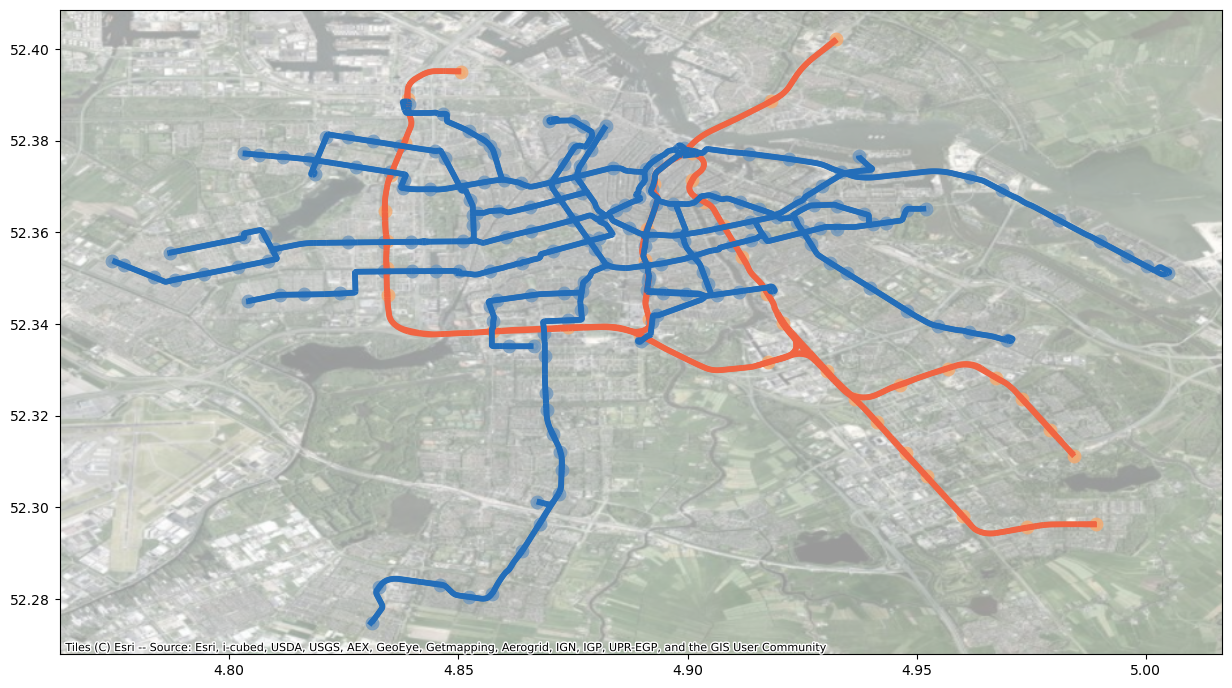

In [116]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
# 读取地铁线路文件
metro_lines = gpd.read_file("./Metro lines.GPKG")

# 确保所有 GeoDataFrame 对象的 CRS 一致
common_crs = metro_lines.crs

# 假设原始 CRS 是 'EPSG:4326'
original_crs = 'EPSG:4326'

# 设置原始 CRS
city_sub_new_edges_gdf = city_sub_new_edges_gdf.set_crs(original_crs, allow_override=True)
city_tram_new_edges_gdf = city_tram_new_edges_gdf.set_crs(original_crs, allow_override=True)
city_sub_new_stations_gdf = city_sub_new_stations_gdf.set_crs(original_crs, allow_override=True)
city_tram_new_stations_gdf = city_tram_new_stations_gdf.set_crs(original_crs, allow_override=True)

# 将所有 GeoDataFrame 转换为与 metro_lines 相同的 CRS
city_sub_new_edges_gdf = city_sub_new_edges_gdf.to_crs(common_crs)
city_tram_new_edges_gdf = city_tram_new_edges_gdf.to_crs(common_crs)
city_sub_new_stations_gdf = city_sub_new_stations_gdf.to_crs(common_crs)
city_tram_new_stations_gdf = city_tram_new_stations_gdf.to_crs(common_crs)

fig, ax = plt.subplots(figsize = [15,12])

plt.rcParams.update({'font.size': 25})



city_sub_new_edges_gdf.plot(ax =ax, color = '#F06543', linewidth = 4)
city_tram_new_edges_gdf.plot(ax =ax, color = '#246EB9', linewidth = 4)
city_sub_new_stations_gdf.plot(ax =ax, color = '#F3AA71', alpha=0.8, linewidth = 4)
city_tram_new_stations_gdf.plot(ax =ax, color = '#7197BB', alpha=0.8, linewidth = 4)



# city_sub_new_edges_gdf.plot(ax =ax, color = 'red', linewidth = 4, label = 'Metro Lines')
# city_tram_new_edges_gdf.plot(ax =ax, color = 'blue', linewidth = 4, label = 'Tram Lines')
# city_sub_new_stations_gdf.plot(ax =ax, color = 'red', alpha=0.5, label = 'Metro Stations')
# city_tram_new_stations_gdf.plot(ax =ax, color = 'red', alpha=0.5, label = 'Tram Stations')


ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# legend = ax.legend(loc='lower left', fontsize=25)
# legend.set_bbox_to_anchor((1, 1))  # 设置图例的位置

plt.savefig('Baseline networks of metro and tram', bbox_inches='tight', dpi=600)

plt.show()

# Create more OD pairs

In [117]:
origin_df = pd.DataFrame()
each_o_point = pd.DataFrame()
for route_name, station_df in city_sub_order_route_dict.items():
    first_row_index = 0
    middle_row_index = len(station_df)//2
    each_o_point = station_df.iloc[first_row_index:middle_row_index] 
    origin_df = pd.concat([origin_df,each_o_point])
origin_df.drop_duplicates(subset='geometry', inplace = True)

selected_columns = ['geometry','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)
origin_id_df = pd.merge(origin_df,city_sub_new_nodes,on='geometry',how='left')

In [118]:
origin_id_df

,geometry,name,id,degree
0,POINT (4.9891612 52.2964067),Gein,328,2
1,POINT (4.9740002 52.2956365),Reigersbos,855,2
2,POINT (4.9601264 52.2981319),Holendrecht,854,2
3,POINT (4.9521292 52.306869),Bullewijk,810,2
4,POINT (4.9476178 52.311806),Bijlmer ArenA,809,2
5,POINT (4.9413977 52.3186119),Strandvliet,808,2
6,POINT (4.9365601 52.3236024),Duivendrecht,852,2
7,POINT (4.9304544 52.3297847),Van der Madeweg,828,2
8,POINT (4.9176063 52.3317688),Overamstel,838,2
9,POINT (4.889539 52.337689),Station RAI,857,2


In [119]:
destination_df = pd.DataFrame()
each_d_point = pd.DataFrame()

# for route_name, station_df in city_sub_order_route_dict.items():
#     each_o_point = station_df.iloc[[-1,-2,-3,-4,-5,-6]]
#     destination_df = pd.concat([destination_df,each_o_point])
# for route_name, station_df in city_tram_order_route_dict.items():
#     each_o_point = station_df.iloc[[-1]]
#     destination_df = pd.concat([destination_df,each_o_point])
for route_name, station_df in city_sub_order_route_dict.items():
    middle_row_index = len(station_df)//2
    each_o_point = station_df.iloc[middle_row_index+1:]
    destination_df = pd.concat([destination_df,each_o_point])
destination_df.drop_duplicates(subset='geometry', inplace = True)
destination_df.drop_duplicates(subset='name', inplace = True)

selected_columns = ['geometry','name']
destination_df = destination_df[selected_columns].reset_index(drop=True)
destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')

In [120]:
destination_id_df

,geometry,name,id,degree
0,POINT (4.8575709 52.3384751),Amstelveenseweg,835,2
1,POINT (4.8345741 52.3463868),Henk Sneevlietweg,841,2
2,POINT (4.834401 52.3523291),Heemstedestraat,19,2
3,POINT (4.8344667 52.3580615),Lelylaan,843,2
4,POINT (4.8340343 52.3645962),Postjesweg,848,2
5,POINT (4.8353639 52.3725816),Jan van Galenstraat,846,2
6,POINT (4.838233 52.3794484),De Vlugtlaan,844,2
7,POINT (4.8389786 52.3890375),Station Sloterdijk,121,2
8,POINT (4.8505958 52.3951031),Isolatorweg,805,2
9,POINT (4.9177027 52.3316595),Overamstel,836,2


In [121]:
OD_id_list = []

for index_origin, row_origin in origin_id_df.iterrows():

       
    for index_destination, row_destination in destination_id_df.iterrows():


        if row_origin['name'] != row_destination['name']:
            # Append a dictionary to the list
            OD_id_list.append({
                's_id': row_origin['id'],
                'e_id': row_destination['id']
             })

# Create a DataFrame from the list of dictionaries
OD_id_pairs_df = pd.DataFrame(OD_id_list)  
OD_id_pairs_df

,s_id,e_id
0,328,835
1,328,841
2,328,19
3,328,843
4,328,848
...,...,...
1581,827,822
1582,827,54
1583,827,56
1584,827,812


In [122]:
OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
OD_id_pairs_df.sort_values(by='e_id')

,s_id,e_id
0,855,19
1,260,19
18,807,19
19,859,19
36,831,19
...,...,...
1581,829,866
1582,460,866
1583,831,866
1584,819,866


# Create Connect Edges in 300m for Metro and Tram

In [123]:
buffer_radius = 300

In [124]:
sub_new_stations_buffer_geometry = new_nodes_buffer(city_sub_new_stations,buffer_radius)
sub_new_stations_buffer_geometry

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer,buffer_geometry
0,328,POINT (555390.884 6853898.052),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((555690.884 6853898.052, 555689.44 68..."
1,855,POINT (553703.169 6853757.861),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((554003.169 6853757.861, 554001.725 6..."
2,854,POINT (552158.745 6854212.08),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((552458.745 6854212.08, 552457.301 68..."
3,810,POINT (551268.501 6855802.63),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551568.501 6855802.63, 551567.056 68..."
4,809,POINT (550766.294 6856701.528),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551066.294 6856701.528, 551064.85 68..."
...,...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (552961.225 6859717.546),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((553261.225 6859717.546, 553259.78 68..."
83,823,POINT (551775.962 6860088.944),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((552075.962 6860088.944, 552074.517 6..."
84,829,POINT (550617.07 6859438.093),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((550917.07 6859438.093, 550915.626 68..."
85,827,POINT (548836.771 6859966.806),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54","POLYGON ((549136.771 6859966.806, 549135.327 6..."


In [125]:
city_tram_new_stations_ftn = add_footnote_to_new_nodes(city_tram_new_stations)
city_tram_new_stations_ftn

,id_tram,geometry_tram,degree_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,2209,POINT (549095.945 6865626.846),2,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,2371,POINT (548687.336 6865651.437),2,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,2474,POINT (548326.739 6865502.838),2,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,2480,POINT (547329.238 6865312.719),2,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,2466,POINT (546978.593 6865909.649),2,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,2427,POINT (548393.23 6866966.046),2,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,2676,POINT (548760.528 6867340.75),2,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,2383,POINT (549343.063 6867853.627),2,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,2619,POINT (549714.592 6867935.478),2,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [126]:
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_stations_buffer_geometry,city_tram_new_stations_ftn)
transfer_stations_sub_to_tram

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,...,geometry_tram,degree_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,819,POINT (547403.1208118391 6863046.022174509),2,Amstelstation,4.917406,52.346636,"(4.9174059, 52.3466361)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (547457.512 6863193.427),2,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
1,820,POINT (547411.0022317873 6863048.24534716),2,Amstelstation,4.917477,52.346648,"(4.9174767, 52.3466483)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,POINT (547457.512 6863193.427),2,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
2,834,POINT (540744.7124492757 6861534.261047471),2,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,POINT (540706.441 6861549.328),2,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
3,834,POINT (540744.7124492757 6861534.261047471),2,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,POINT (540712.274 6861514.766),2,Amstelveenseweg,4.857301,52.338232,"(4.857301, 52.3382323)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,"2, 24","2, 24"
4,835,POINT (540742.3190802236 6861559.002901717),2,Amstelveenseweg,4.857571,52.338475,"(4.8575709, 52.3384751)",Metro 50: Gein => Isolatorweg,subway,"50, 51",...,POINT (540706.441 6861549.328),2,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,138,POINT (546346.9548790398 6865723.4216876915),2,Weesperplein,4.907918,52.361326,"(4.9079182, 52.3613263)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,POINT (546258.244 6865664.324),2,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
110,460,POINT (546339.0511951934 6865720.341024122),2,Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (546485.013 6865737.622),2,Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 19, 7","1, 19, 7"
111,460,POINT (546339.0511951934 6865720.341024122),2,Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (546258.244 6865664.324),2,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
112,840,POINT (542567.1127011032 6861713.358806675),2,Zuid,4.873963,52.339322,"(4.8739633, 52.3393223)",Metro 50: Gein => Isolatorweg,subway,"50, 51, 52",...,POINT (542480.462 6861985.602),2,Station Zuid,4.873185,52.340817,"(4.8731849, 52.3408165)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,tram,"25, 5","25, 5"


In [127]:
transfer_stations_sub_to_tram.loc[:,['name','name_tram']]

,name,name_tram
0,Amstelstation,Amstelstation
1,Amstelstation,Amstelstation
2,Amstelveenseweg,Amstelveenseweg
3,Amstelveenseweg,Amstelveenseweg
4,Amstelveenseweg,Amstelveenseweg
...,...,...
109,Weesperplein,Weesperplein
110,Weesperplein,Weesperplein
111,Weesperplein,Weesperplein
112,Zuid,Station Zuid


In [128]:
transfer_stations_sub_to_tram.copy().drop_duplicates(subset='name').name

0            Amstelstation
2          Amstelveenseweg
6         Centraal Station
56                 De Pijp
60            De Vlugtlaan
64             Europaplein
71         Heemstedestraat
75     Jan van Galenstraat
79                Lelylaan
83                   Rokin
87             Station RAI
93      Station Sloterdijk
95            Vijzelgracht
103          Waterlooplein
108           Weesperplein
112                   Zuid
Name: name, dtype: object

In [129]:
transfer_stations_sub_to_tram.copy().drop_duplicates(subset='name_tram').name_tram

0                  Amstelstation
2                Amstelveenseweg
6               Centraal Station
56                       De Pijp
60     Burgemeester de Vlugtlaan
64                  Dintelstraat
65                   Europaplein
71               Heemstedestraat
75           Jan van Galenstraat
79              Station Lelylaan
83                         Rokin
87                    Drentepark
89                   Station RAI
93            Station Sloterdijk
95                  Vijzelgracht
103                Waterlooplein
105          Meester Visserplein
108                 Weesperplein
112                 Station Zuid
Name: name_tram, dtype: object

In [130]:
# transfer_stations_sub_to_tram.to_excel('transfer_stations_sub_to_tram_0426.xlsx',header = True,index = False)

In [131]:
connect_edges_sub_to_tram = create_connect_edges(transfer_stations_sub_to_tram)
connect_edges_sub_to_tram

,geometry,from_id,to_id,from_to,to_from
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)"
1,"LINESTRING (4.9174767 52.3466483, 4.9178945 52...",820,2101,"(820, 2101)","(2101, 820)"
2,"LINESTRING (4.8575924 52.3383393, 4.8572486 52...",834,2515,"(834, 2515)","(2515, 834)"
3,"LINESTRING (4.8575924 52.3383393, 4.857301 52....",834,2516,"(834, 2516)","(2516, 834)"
4,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)"
...,...,...,...,...,...
109,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",2448,138,"(2448, 138)","(138, 2448)"
110,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",2449,460,"(2449, 460)","(460, 2449)"
111,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",2448,460,"(2448, 460)","(460, 2448)"
112,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",1068,840,"(1068, 840)","(840, 1068)"


In [132]:
start_id_for_connect_edges_sub_to_tram = city_tram_connected_edges['id'].iloc[-1] + 1
start_id_for_connect_edges_sub_to_tram

np.int64(3342)

In [133]:
connect_edges_sub_to_tram_id_list = [start_id_for_connect_edges_sub_to_tram] + [i for i in range(start_id_for_connect_edges_sub_to_tram + 1, start_id_for_connect_edges_sub_to_tram + len(connect_edges_sub_to_tram))]
# connect_edges_sub_to_tram_id_list

In [134]:
connect_edges_sub_to_tram['id'] = connect_edges_sub_to_tram_id_list

# Set weights attribute of connecting edges to a value much more higher than the maximum value in city_sub_new_edges to avoid frequently transfer: 15 min/60 min*25000 m/h
connect_edges_sub_to_tram['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 15/60*25000
# Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges and city_tram_new_edges: 15mins for passengers' walking transfer
connect_edges_sub_to_tram['time'] = 15

In [135]:
# connect_edges_sub_to_tram['id'] = connect_edges_sub_to_tram_id_list

# # Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
# connect_edges_sub_to_tram['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 10000000000
# # Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
# connect_edges_sub_to_tram['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] + city_tram_new_edges.sort_values(by='time').time.iloc[-1] + 1

In [136]:
connect_edges_sub_to_tram

,geometry,from_id,to_id,from_to,to_from,id,weights,time
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)",3342,9013.0,15
1,"LINESTRING (4.9174767 52.3466483, 4.9178945 52...",820,2101,"(820, 2101)","(2101, 820)",3343,9013.0,15
2,"LINESTRING (4.8575924 52.3383393, 4.8572486 52...",834,2515,"(834, 2515)","(2515, 834)",3344,9013.0,15
3,"LINESTRING (4.8575924 52.3383393, 4.857301 52....",834,2516,"(834, 2516)","(2516, 834)",3345,9013.0,15
4,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)",3346,9013.0,15
...,...,...,...,...,...,...,...,...
109,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",2448,138,"(2448, 138)","(138, 2448)",3565,9013.0,15
110,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",2449,460,"(2449, 460)","(460, 2449)",3566,9013.0,15
111,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",2448,460,"(2448, 460)","(460, 2448)",3567,9013.0,15
112,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",1068,840,"(1068, 840)","(840, 1068)",3568,9013.0,15


In [137]:
gpd.GeoDataFrame(connect_edges_sub_to_tram[['geometry','id','from_id','to_id','time','weights']]).to_file('connect_edges_sub_to_tram0705.gpkg',driver = 'GPKG')

In [138]:
# city_sub_new_stations

In [139]:
# city_tram_new_stations

# Test OD pairs on normal situation

### Load DiGraph with city_two_layer_network_nodes and city_two_layer_network_edges

In [140]:
city_two_layer_network_nodes = pd.concat([city_sub_new_nodes,city_tram_new_nodes])

In [141]:
city_two_layer_network_edges = pd.concat([city_sub_connected_edges,city_tram_connected_edges,connect_edges_sub_to_tram])
# city_two_layer_network_edges

In [142]:
G1 = nx.DiGraph()
for node_index, row in city_two_layer_network_nodes.iterrows():
    geometry = row['geometry']
    node_id = row['id']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [143]:
edges_for_G1 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    # capacity = row['capacity']
    # length = row['weights']
    G1.add_edge(from_id, to_id, weight = weight)

### Test all OD pairs

In [144]:
OD_shortest_path_nodes_id = {}
OD_shortest_path_edges = {}

for index, row in OD_id_pairs_df.iterrows():
    path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weight")
    # path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weights")
    OD_shortest_path_nodes_id[index] = path_s_e
    OD_shortest_path_edges[index] = short_path_edges

In [145]:
# OD_shortest_path_edges

In [146]:
# OD_shortest_path_nodes_id

In [147]:
len(OD_shortest_path_nodes_id)

1586

In [148]:
len(OD_shortest_path_edges)

1586

# Test tageted attack on each edges_DWCL

In [149]:
city_two_layer_network_edges_reset = city_two_layer_network_edges.reset_index(drop=True)
city_two_layer_network_edges_reset = city_two_layer_network_edges_reset.reset_index()
city_two_layer_network_edges_reset

,index,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,0,39271219,"LINESTRING (4.8338612 52.3645995, 4.8338659 52...",subway,None,163,147,25,31.352181,0.001254,31.0,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
1,1,23207806,"LINESTRING (4.8338659 52.3643177, 4.8338791 52...",subway,None,16,25,23,59.170137,0.002367,59.0,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
2,2,23207802,"LINESTRING (4.8338791 52.3637859, 4.8339056 52...",subway,None,15,23,24,93.935464,0.003757,93.0,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
3,3,26983218,"LINESTRING (4.8339056 52.3629417, 4.8339159 52...",subway,None,106,24,109,41.168856,0.001647,41.0,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,4,26983222,"LINESTRING (4.8339159 52.3625717, 4.8339214 52...",subway,None,114,109,588,11.809676,0.000472,11.0,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2533,NaN,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",NaN,NaN,3565,2448,138,NaN,15.000000,9013.0,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN
2534,2534,NaN,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",NaN,NaN,3566,2449,460,NaN,15.000000,9013.0,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN
2535,2535,NaN,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",NaN,NaN,3567,2448,460,NaN,15.000000,9013.0,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN
2536,2536,NaN,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",NaN,NaN,3568,1068,840,NaN,15.000000,9013.0,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN


In [150]:
removed_edges = pd.merge(city_two_layer_network_edges_reset,connect_edges_sub_to_tram,on='geometry',how='right')
removed_edges.set_index('index', inplace=True)
removed_edges

,osm_id,geometry,railway,service,id_x,from_id_x,to_id_x,distance,time_x,weights_x,...,route_name_list,route,ref,from_id_y,to_id_y,from_to_y,to_from_y,id_y,weights_y,time_y
index,,,,,,,,,,,,,,,,,,,,,
2310,NaN,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",NaN,NaN,3342,819,2101,NaN,15.0,9013.0,...,NaN,NaN,NaN,819,2101,"(819, 2101)","(2101, 819)",3342,9013.0,15
2311,NaN,"LINESTRING (4.9174767 52.3466483, 4.9178945 52...",NaN,NaN,3343,820,2101,NaN,15.0,9013.0,...,NaN,NaN,NaN,820,2101,"(820, 2101)","(2101, 820)",3343,9013.0,15
2312,NaN,"LINESTRING (4.8575924 52.3383393, 4.8572486 52...",NaN,NaN,3344,834,2515,NaN,15.0,9013.0,...,NaN,NaN,NaN,834,2515,"(834, 2515)","(2515, 834)",3344,9013.0,15
2313,NaN,"LINESTRING (4.8575924 52.3383393, 4.857301 52....",NaN,NaN,3345,834,2516,NaN,15.0,9013.0,...,NaN,NaN,NaN,834,2516,"(834, 2516)","(2516, 834)",3345,9013.0,15
2314,NaN,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",NaN,NaN,3346,835,2515,NaN,15.0,9013.0,...,NaN,NaN,NaN,835,2515,"(835, 2515)","(2515, 835)",3346,9013.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,NaN,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",NaN,NaN,3565,2448,138,NaN,15.0,9013.0,...,NaN,NaN,NaN,2448,138,"(2448, 138)","(138, 2448)",3565,9013.0,15
2534,NaN,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",NaN,NaN,3566,2449,460,NaN,15.0,9013.0,...,NaN,NaN,NaN,2449,460,"(2449, 460)","(460, 2449)",3566,9013.0,15
2535,NaN,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",NaN,NaN,3567,2448,460,NaN,15.0,9013.0,...,NaN,NaN,NaN,2448,460,"(2448, 460)","(460, 2448)",3567,9013.0,15


In [151]:
removed_edges_id_list = list(removed_edges.index)

In [152]:
removed_edges_id_list

[2310,
 2311,
 2312,
 2313,
 2314,
 2315,
 2316,
 2317,
 2318,
 2319,
 2320,
 2321,
 2322,
 2323,
 2324,
 2325,
 2326,
 2327,
 2328,
 2329,
 2330,
 2331,
 2332,
 2333,
 2334,
 2335,
 2336,
 2337,
 2338,
 2339,
 2340,
 2341,
 2342,
 2343,
 2344,
 2345,
 2346,
 2347,
 2348,
 2349,
 2350,
 2351,
 2352,
 2353,
 2354,
 2355,
 2356,
 2357,
 2358,
 2359,
 2360,
 2361,
 2362,
 2363,
 2364,
 2365,
 2366,
 2367,
 2368,
 2369,
 2370,
 2371,
 2372,
 2373,
 2374,
 2375,
 2376,
 2377,
 2378,
 2379,
 2380,
 2381,
 2382,
 2383,
 2384,
 2385,
 2386,
 2387,
 2388,
 2389,
 2390,
 2391,
 2392,
 2393,
 2394,
 2395,
 2396,
 2397,
 2398,
 2399,
 2400,
 2401,
 2402,
 2403,
 2404,
 2405,
 2406,
 2407,
 2408,
 2409,
 2410,
 2411,
 2412,
 2413,
 2414,
 2415,
 2416,
 2417,
 2418,
 2419,
 2420,
 2421,
 2422,
 2423,
 2424,
 2425,
 2426,
 2427,
 2428,
 2429,
 2430,
 2431,
 2432,
 2433,
 2434,
 2435,
 2436,
 2437,
 2438,
 2439,
 2440,
 2441,
 2442,
 2443,
 2444,
 2445,
 2446,
 2447,
 2448,
 2449,
 2450,
 2451,
 2452,

In [153]:
def parameter_wcl(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id):
    for od, shortest_path_edges_df in OD_shortest_path_edges.items():
    
        shortest_path_edges_df['DW_weights'] = 1 / shortest_path_edges_df['weights'].sum()
        shortest_path_edges_df['DW_distance'] = 1 / shortest_path_edges_df['distance'].sum()
        
        if len(shortest_path_edges_df) > 1:  
            shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_weights')] = 0
            shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_distance')] = 0
        
    grouped = OD_id_pairs_df.groupby('e_id').apply(lambda x: x.index.tolist())
    index_dict = grouped.to_dict()
    
    # Define an empty dictionary to store the merged DataFrames
    merged_df_dict = {}
    
    # Iterate over each key-value pair in index_dict
    for e_id, indices in index_dict.items():
        # Initialize an empty list to store DataFrames to merge
        dfs_to_merge = []
        
        # Loop through each index in the list of indices
        for idx in indices:
            # Check if the index exists in OD_shortest_path_edges
            if idx in OD_shortest_path_edges:
                # Append the corresponding DataFrame to the list
                dfs_to_merge.append(OD_shortest_path_edges[idx])
        
        # If there are DataFrames to merge, concatenate them
        if dfs_to_merge:
            merged_df = pd.concat(dfs_to_merge)
            # Store the merged DataFrame in the new dictionary
            merged_df_dict[e_id] = merged_df
            
    # Extract the last element from each list in OD_shortest_path_nodes_id.values()
    sink_id = [lst[-1] for lst in OD_shortest_path_nodes_id.values()]
    
    # Create a DataFrame with 'id' column from sink_id
    OD_sink_weight_df = pd.DataFrame({'id': sink_id})
    
    # Sort the DataFrame by 'id' and reset the index
    OD_sink_weight_df = OD_sink_weight_df.sort_values(by='id').reset_index(drop=True)
    
    # Count occurrences of each 'id' and add as a new column 'count'
    OD_sink_weight_df['count'] = OD_sink_weight_df.groupby('id')['id'].transform('size')
    
    # Remove duplicates based on 'id' to keep unique entries
    OD_sink_weight_df = OD_sink_weight_df.drop_duplicates(subset=['id']).reset_index(drop=True)
    
    # Iterate over merged_df_dict items to calculate 'weight' for each 'id'
    for e_id, all_edges_df in merged_df_dict.items():
        # Check if e_id is in 'id' column of OD_sink_weight_df
        if e_id in OD_sink_weight_df['id'].values:
            # Sum up the 'DW_weights' column in all_edges_df and assign to 'DW_weights' in OD_sink_weight_df
            OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_weights'] = all_edges_df['DW_weights'].sum()
            OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_distance'] = all_edges_df['DW_distance'].sum()
            
    return OD_sink_weight_df

In [154]:
def OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id):
    OD_sink_weight_df = parameter_wcl(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id)
    OD_dis_sink_weight_df = parameter_wcl(OD_id_pairs_df,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    OD_sink_id_wcl = pd.merge(OD_sink_weight_df,OD_dis_sink_weight_df,on='id',how='outer')
    OD_sink_id_wcl['count_y'] = OD_sink_id_wcl['count_y'].fillna(0)
    OD_sink_id_wcl['DW_weights_y'] = OD_sink_id_wcl['DW_weights_y'].fillna(0)
    OD_sink_id_wcl['DW_distance_y'] = OD_sink_id_wcl['DW_distance_y'].fillna(0)
    OD_sink_id_wcl['DWCL_weights'] = OD_sink_id_wcl.apply(lambda row: (row['DW_weights_y']*row['count_y']) / (row['DW_weights_x']*row['count_x']), axis=1)
    OD_sink_id_wcl['DWCL_distance'] = OD_sink_id_wcl.apply(lambda row: (row['DW_distance_y']*row['count_y']) / (row['DW_distance_x']*row['count_x']), axis=1)
    return OD_sink_id_wcl

In [156]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(200):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [157]:
dwcl_df

,removed_edge_id,DWCL_weights,DWCL_distance
0,163,0.076664,0.025717
1,16,0.076664,0.025717
2,15,0.076664,0.025717
3,106,0.076664,0.025717
4,114,0.076664,0.025717
...,...,...,...
195,896,0.014739,-0.015024
196,880,0.044038,-0.038493
197,407,0.128411,0.002519
198,886,0.027827,-0.038083


In [164]:
city_two_layer_network_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,39271219,"LINESTRING (4.8338612 52.3645995, 4.8338659 52...",subway,None,163,147,25,31.352181,0.001254,31.0,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
1,23207806,"LINESTRING (4.8338659 52.3643177, 4.8338791 52...",subway,None,16,25,23,59.170137,0.002367,59.0,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
2,23207802,"LINESTRING (4.8338791 52.3637859, 4.8339056 52...",subway,None,15,23,24,93.935464,0.003757,93.0,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
3,26983218,"LINESTRING (4.8339056 52.3629417, 4.8339159 52...",subway,None,106,24,109,41.168856,0.001647,41.0,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,26983222,"LINESTRING (4.8339159 52.3625717, 4.8339214 52...",subway,None,114,109,588,11.809676,0.000472,11.0,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,NaN,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",NaN,NaN,3565,2448,138,NaN,15.000000,9013.0,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN
2534,NaN,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",NaN,NaN,3566,2449,460,NaN,15.000000,9013.0,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN
2535,NaN,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",NaN,NaN,3567,2448,460,NaN,15.000000,9013.0,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN
2536,NaN,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",NaN,NaN,3568,1068,840,NaN,15.000000,9013.0,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN


In [160]:
dwcl_df[dwcl_df.DWCL_distance < 0]

,removed_edge_id,DWCL_weights,DWCL_distance
6,108,0.061313,-0.016505
14,161,0.073624,-0.082147
15,102,0.073624,-0.082147
16,101,0.059994,-0.049285
17,14,0.059994,-0.049285
...,...,...,...
194,879,0.044038,-0.038493
195,896,0.014739,-0.015024
196,880,0.044038,-0.038493
198,886,0.027827,-0.038083


In [163]:
OD_sink_id_wcl

,id,count_x,DW_weights_x,DW_distance_x,count_y,DW_weights_y,DW_distance_y,DWCL_weights,DWCL_distance
0,19,43,0.002839,0.004542,43,0.002806,0.004539,0.988467,0.999306
1,54,43,0.002542,0.005665,43,0.002542,0.005665,1.000000,1.000000
2,56,43,0.002402,0.005147,43,0.002402,0.005147,1.000000,1.000000
3,61,43,0.002134,0.004236,43,0.002134,0.004236,1.000000,1.000000
4,121,43,0.002106,0.005423,43,0.002063,0.005714,0.979162,1.053653
5,137,43,0.003703,0.007995,43,0.003703,0.007995,1.000000,1.000000
6,138,43,0.004067,0.007499,43,0.004024,0.008290,0.989631,1.105458
7,139,43,0.004570,0.007623,43,0.004529,0.007868,0.991061,1.032056
8,144,43,0.002585,0.004307,43,0.002571,0.004333,0.994901,1.006006
9,180,42,0.002363,0.006541,42,0.001696,0.006940,0.717654,1.061130
